# Sparse Hebbian Learning: basics

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

homeo_method = 'HEH'
tag = 'quantization'

matname = tag + '_' + homeo_method
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method=homeo_method, eta_homeo=0.05, alpha_homeo=0.02, C=5., nb_quant=128, P_cum=None, verbose=verbose)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname='quantization')

Extracting data..No cache found data_cache/quantization_data: Extracting data... Extracting data..Photo2018-01-18_0440462510.jpg, Photo2018-01-18_0309392473.jpg, Photo2018-01-18_0343102547.jpg, Photo2018-02-18_0911262631 square.jpg, Photo2018-01-18_0327052545.jpg, Photo2018-01-18_0440352508.jpg, Photo2018-01-18_0230432458.jpg, Photo2018-01-18_0316462527.jpg, Photo2018-01-18_0553172551.jpg, Photo2018-01-18_0423102502.jpg, Photo2018-01-18_0422432500.jpg, Photo2018-01-18_0441022511.jpg, Data is of shape : (65532, 144) - done in 73.40s.
Data is of shape : (65532, 144) - done in 73.64s.


In [5]:
!ls -l {shl.data_cache}/{tag}*

-rw-r--r--  1 laurentperrinet  staff  75492992 Feb 23 12:44 data_cache/quantization_data.npy


In [6]:
!ls -l {shl.data_cache}/{matname}*

ls: data_cache/quantization_HEH*: No such file or directory


In [7]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65532, 144)
average of patches =  1.2082279857504907e-05  +/-  0.0066444470393307664
average energy of data =  0.029788900141200267 +/- 0.037919085394187625


In [8]:
shl.do_precision

False

## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found data_cache/quantization_HEH_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65532 patches
Iteration   1 /   1025 (elapsed time:   3s,   0mn   3s)
Iteration  129 /   1025 (elapsed time:  525s,   8mn  45s)
Iteration  257 /   1025 (elapsed time:  1208s,  20mn   8s)
Iteration  385 /   1025 (elapsed time:  1831s,  30mn  31s)
Iteration  513 /   1025 (elapsed time:  2517s,  41mn  57s)
Iteration  641 /   1025 (elapsed time:  3177s,  52mn  57s)
Iteration  769 /   1025 (elapsed time:  3719s,  61mn  59s)
Iteration  897 /   1025 (elapsed time:  4252s,  70mn  52s)
Iteration  1025 /   1025 (elapsed time:  4816s,  80mn  16s)
done (total time:  4821s,  80.4mn)
done in 4821.76s.


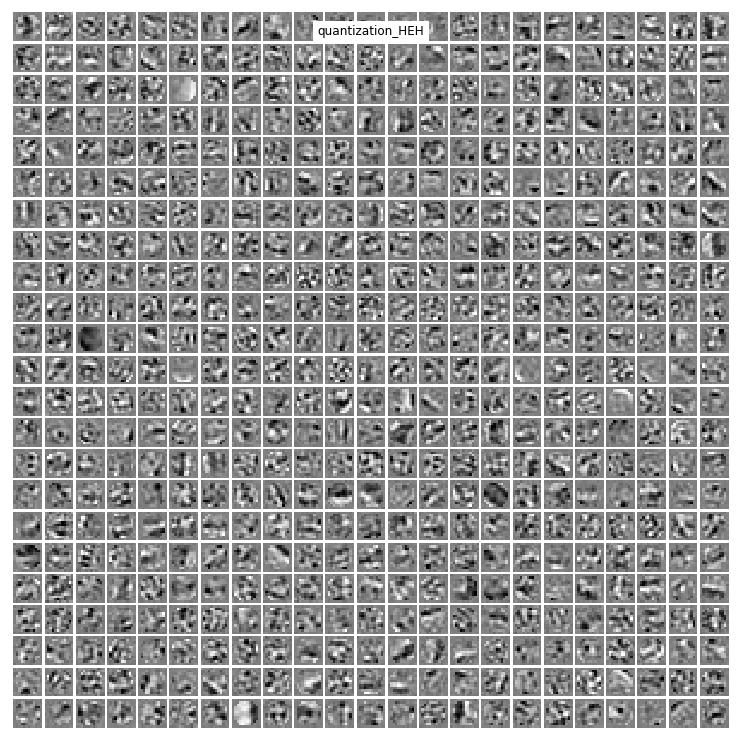

In [9]:
list_figures = ['show_dico']#, 'time_plot_error', 'time_plot_aerror']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [10]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (529, 144)
average of filters =  0.0005721131232466838 +/- 0.010866007662145235
average energy of filters =  1.0 +/- 8.861298048323237e-17


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 529)
average of codewords =  0.002116044619541683
l0-sparseness of codewords =  0.028296313799621928  ~= l0/M = 0.02835538752362949
average energy of codewords =  0.01949983392805739
std of the average of individual patches =  0.0016213766961567088
number of codes, size of reconstructed images =  (256, 144)


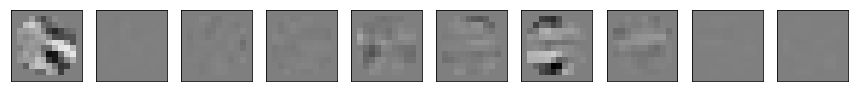

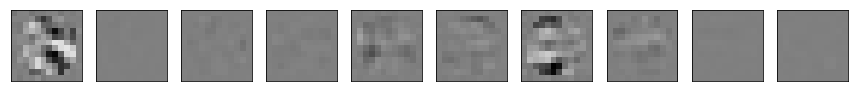

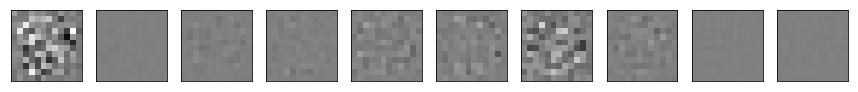

average of data patches =  1.2082279857504907e-05 +/- 0.0066444470393307664
average of residual patches =  -5.740027920433703e-05 +/- 0.0012952003160081602
median energy of data =  0.015431616253758319
average energy of data =  0.029353897899228314 +/- 0.04151432381437271
average error =  -5.740027920433703e-05 +/- 0.017003097786530346
average energy of residual =  0.009814874870241984 +/- 0.013884410697320153
median energy of residual =  0.005604110258532932
average gain of coding =  3.65863331477001 +/- 1.8218655941921855
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 529)
average of codewords =  0.0021160446195416824
l0-sparseness of codewords =  0.028296313799621928  ~= l0/M = 0.02835538752362949
average energy of codewords =  0.019499833928057386
std of the average of individual patches =  0.0016213766961567088
number of codes, size of reconstructed images =  (256, 144)


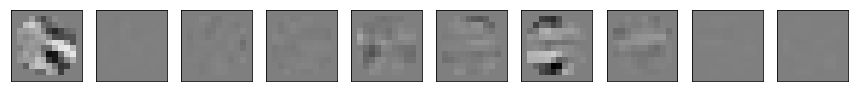

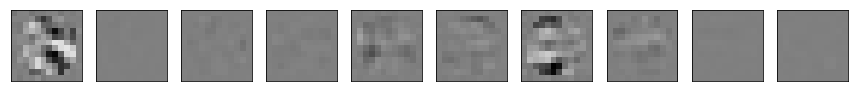

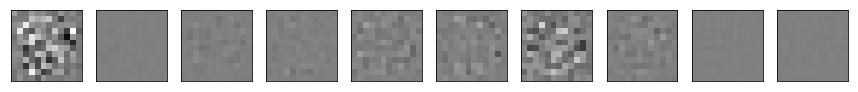

average of data patches =  1.2082279857504907e-05 +/- 0.0066444470393307664
average of residual patches =  -5.740027920433686e-05 +/- 0.0012952003160081607
median energy of data =  0.015431616253758319
average energy of data =  0.029353897899228314 +/- 0.04151432381437271
average error =  -5.740027920433686e-05 +/- 0.017003097786530346
average energy of residual =  0.009814874870241984 +/- 0.013884410697320153
median energy of residual =  0.005604110258532932
average gain of coding =  3.6586333147700105 +/- 1.8218655941921853
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 529)
average of codewords =  0.002125068465666971
l0-sparseness of codewords =  0.028296313799621928  ~= l0/M = 0.02835538752362949
average energy of codewords =  0.01937462447062519
std of the average of individual patches =  0.0016751266209584159
number of codes, size of reconstructed images =  (256, 144)


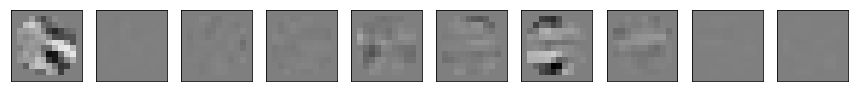

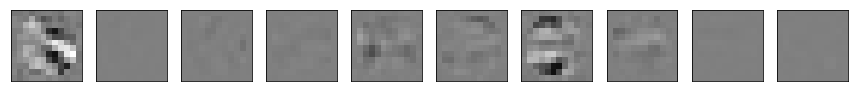

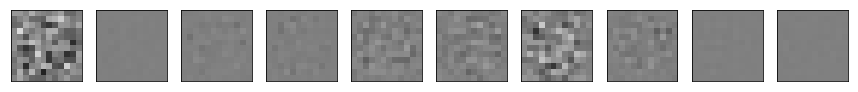

average of data patches =  1.2082279857504907e-05 +/- 0.0066444470393307664
average of residual patches =  -1.1383413450713303e-05 +/- 0.0012853726872621724
median energy of data =  0.015431616253758319
average energy of data =  0.029353897899228314 +/- 0.04151432381437271
average error =  -1.1383413450713303e-05 +/- 0.016833708484168847
average energy of residual =  0.00989190427204803 +/- 0.013620723210781357
median energy of residual =  0.005580094780137754
average gain of coding =  3.626751065453254 +/- 1.8328912586836725


In [11]:
from shl_scripts.shl_encode import mp
nb_quant = 128
record_num_batches = 256
np.random.seed(1973)
indx = np.random.permutation(data.shape[0])[:record_num_batches]
#sparse_code = shl.code(data, dico, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico.P_cum
#P_cum = None
l0_sparseness = 150
l0_sparseness = shl.l0_sparseness

for P_cum, gain in zip([None, P_cum_zeroeffect, dico.P_cum], [np.ones(shl.n_dictionary), None, None]):
    print(50*'🐒')
    sparse_code = mp(data[indx, :], dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('average energy of codewords = ', sparse_code.std(axis=0).mean())
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

    patches = sparse_code @ dico.dictionary
    print('number of codes, size of reconstructed images = ', patches.shape)

    from shl_scripts.shl_tools import show_data
    max_patches = 10
    fig, axs = show_data(data[indx, :][:max_patches, :])
    plt.show()
    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    
    error = (data[indx, :] - patches)
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(data[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
    #SD = np.linalg.norm(data[indx, :])/record_num_batches

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    #print('total energy of data = ', np.sqrt(np.sum(data**2)))
    #print('total deviation of data = ', np.sum(np.abs(data)))
    print('average error = ', error.mean(), '+/-', error.std())
    SE = np.sqrt(np.mean(error**2, axis=1))
    #SE = np.linalg.norm(error)/record_num_batches

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    #print('total energy of residual = ', np.sqrt(np.sum(error**2)))
    #print('total deviation of residual = ', np.sum(np.abs(error)))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

## Quantization of the coefficients

In [12]:
from shl_scripts.shl_learn import get_P_cum
C = 5.
P_cum = get_P_cum(sparse_code, C=C, nb_quant=nb_quant)
P_cum.shape

(529, 128)

In [13]:
P_cum = dico.P_cum
P_cum.shape

(529, 128)

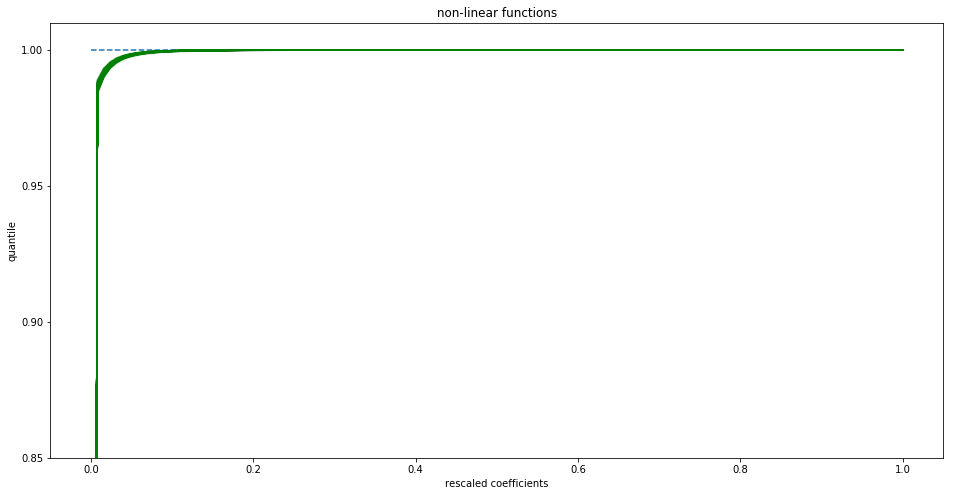

In [14]:
from shl_scripts.shl_tools import plot_P_cum
fig, ax = plot_P_cum(P_cum, verbose=False);
ax.set_ylim(0.85, 1.01);

In [15]:
P_cum.shape

(529, 128)

In [16]:
from shl_scripts.shl_encode import quantile, rescaling
#sparse_code = mp(data, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum)
stick = np.arange(shl.n_dictionary)*nb_quant
q = quantile(P_cum, rescaling(sparse_code, C=C), stick, do_fast=True)

In [17]:
from shl_scripts.shl_encode import inv_quantile, inv_rescaling
q_sparse_code = inv_rescaling(inv_quantile(P_cum, q), C=C)
print('total deviation of coefficients = ', np.mean(np.abs(q_sparse_code-sparse_code)))

total deviation of coefficients =  1.8303580405509767e-05


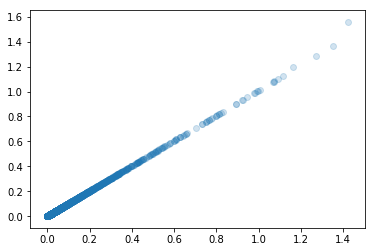

In [18]:
plt.scatter(sparse_code.ravel(), q_sparse_code.ravel(), alpha=.2);

In [19]:
P_cum.mean(axis=0).shape

(128,)

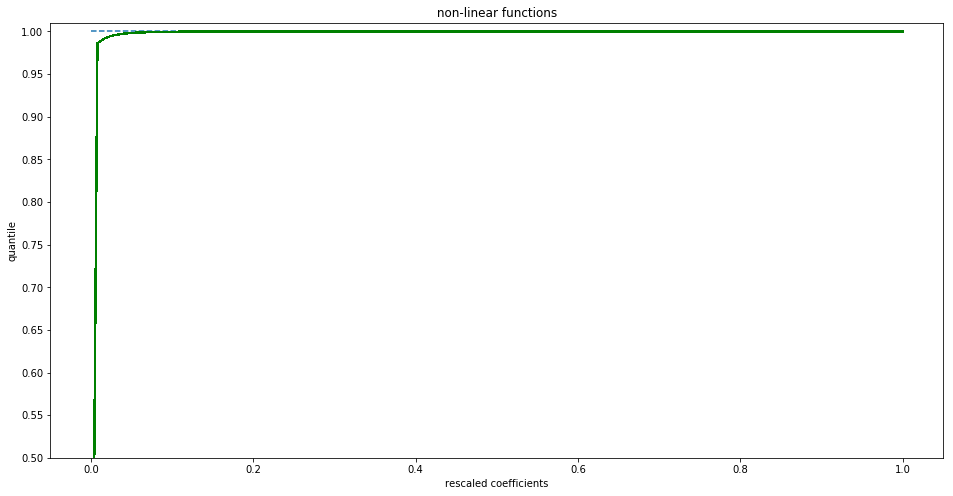

In [20]:
P_cum_mean = P_cum.mean(axis=0)[np.newaxis, :] * np.ones((shl.n_dictionary, nb_quant))
fig, ax = plot_P_cum(P_cum_mean, verbose=False);
ax.set_ylim(0.5, 1.01);

In [21]:
#q_sparse_code = inv_rescaling(inv_quantile(P_cum_mean, q), C=C)
q_sparse_code = inv_rescaling(inv_quantile(P_cum_mean, q), C=C)
print('total deviation of coefficients = ', np.mean(np.abs(sparse_code)))
print('total deviation of coefficients = ', np.mean(np.abs(q_sparse_code-sparse_code)))

total deviation of coefficients =  0.002125068465666971
total deviation of coefficients =  0.00019916050446837916


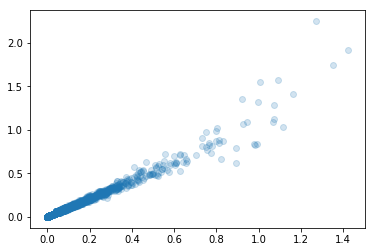

In [22]:
plt.scatter(sparse_code.ravel(), q_sparse_code.ravel(), alpha=.2);

average of data patches =  1.2082279857504907e-05 +/- 0.0066444470393307664
average of residual patches =  6.069932951896793e-05 +/- 0.0017602035200387429
median energy of data =  0.03813283823752356
average energy of data =  0.03813283823752356 +/- 0.0
average energy of residual =  0.015049870375324868 +/- 0.0
median energy of residual =  0.015049870375324868
average gain of coding =  2.5337652276423954 +/- 0.0


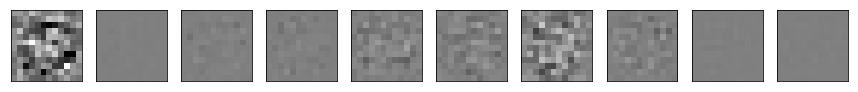

In [23]:
patches = q_sparse_code @ dico.dictionary
error = data[indx, :] - patches
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(data[:max_patches, :])))
print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
#SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
SD = np.linalg.norm(data[indx, :])/record_num_batches
print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())
#print('total energy of data = ', np.sqrt(np.sum(data**2)))
#print('total deviation of data = ', np.sum(np.abs(data)))
#SE = np.sqrt(np.mean(error**2, axis=1))
SE = np.linalg.norm(error)/record_num_batches

print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
#print('total energy of residual = ', np.sqrt(np.sum(error**2)))
#print('total deviation of residual = ', np.sum(np.abs(error)))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

In [24]:
P_cum[0, -2]

0.999999999999999

## Version used

In [25]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
Fri Feb 23 14:06:00 2018 CET